# Solving the n-Queens Problem using Local Search

Student Name: [Add your name]

I have used the following AI tools: [list tools]

I understand that my submission needs to be my own work: [your initials]


## Learning Outcomes

* Implement multiple hill climbing search variants to solve the n-Queens problem.
* Apply simulated annealing with appropriate temperature scheduling to overcome local optima.
* Compare algorithm performance using runtime, solution quality, and success rate metrics.
* Analyze and visualize algorithm performance across different problem sizes.
* Graduate Students: Design and test alternative local move operators to improve search efficiency.

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file. 

## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum. 

## Helper functions

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""
    
    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Calculate the number of conflicts, i.e., the objective function."""

    n = len(board)
    
    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n
    
    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1
    
    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))

# decrease the font size to fit larger boards
def show_board(board, cols = ['white', 'gray'], fontsize = 48):  
    """display the board"""
    
    n = len(board)
    
    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0): 
                display[i,j] = 1
    
    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap, 
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])
    
    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize, 
                 horizontalalignment = 'center',
                 verticalalignment = 'center')
    
    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 4 conflicts.


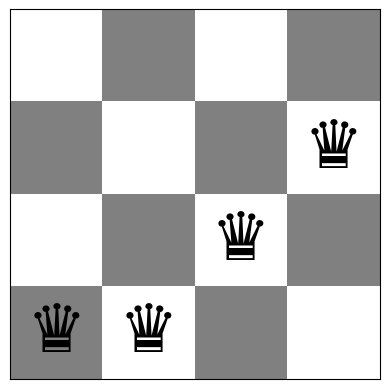

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [47]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


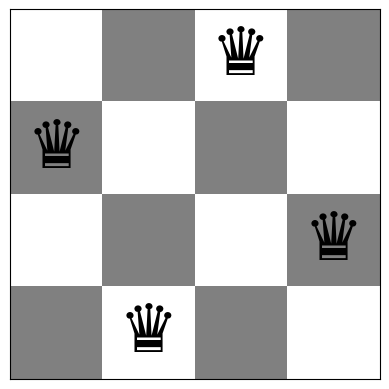

In [48]:
board = [1,3,0,2]
show_board(board)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your submitted file is readable and contains all figures.
4. Document your code. Use comments in the code and add a discussion of how your implementation works and your design choices.

## Task 1: Steepest-ascend Hill Climbing Search [20 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum. 

In [49]:
# Code and description go here
import numpy as np 
def compute_best_neighbor(board):
    """
    Find the neighbor (board) with the least number of conflicts by considering all local moves:
        - Select 1 column, move queen to every other row.
    Returns:
        best_board, best_conf, improved (bool)
    """
    n = len(board) # board is list
    current_conf = conflicts(board) # number of conflicts 
    best_conf = current_conf
    best_neighbors = []
    
    for col in range(n): # 0 1 2 3 ... n  
        current_row = board[col]    # [1,3,0,2]
        for new_row in range(n): # 0 1 2 3 ... n  
            if new_row == current_row: 
                continue
            candidate = board.copy()
            candidate[col] = new_row # step 1: [3,3,0,2]
            c_conf = conflicts(candidate) # the number of conflicts : 1
            if c_conf < best_conf: # best conflict checker
                best_conf = c_conf
                best_neighbors = [candidate]
            elif c_conf == best_conf: # if như conflict hiện tại bằng với best_conf thì add list vào luôn
                best_neighbors.append(candidate)
    if best_neighbors and best_conf < current_conf:
        idx = np.random.randint(0, len(best_neighbors))
        return best_neighbors[idx] , best_conf, True
    else:
        return board.copy() , current_conf , False 

def steepest_ascent_hill_climb(start_board,max_iters=10000, verbose=False):
    board = start_board.copy()
    step = 0 
    history = [conflicts(board)]
    for _ in range(max_iters):
        next_board , next_conf, improved = compute_best_neighbor(board)
        if not improved :
            break
        board = next_board
        step += 1 
        history.append(next_conf)
        if verbose:
            print(f"Step {step}: conflict = {next_conf}")
        if next_conf == 0:
            break
    return board, conflicts(board) , step , history
    

Start board:
Board with 5 conflicts.


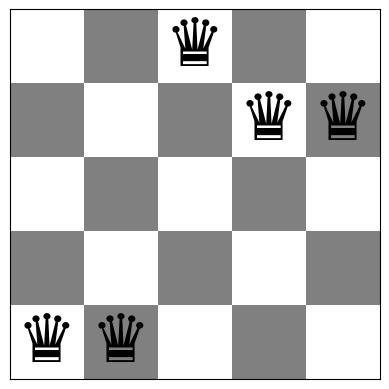

Finished in 2 steps, conflicts = 0
Board with 0 conflicts.


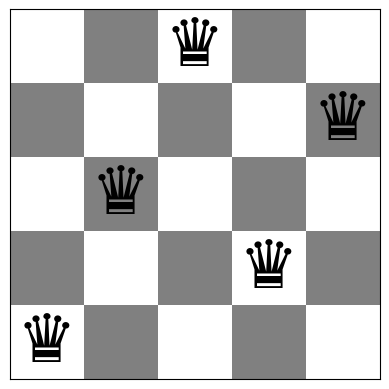

In [50]:
n = 5  # có thể đổi sang 4, 12, ...
start = random_board(n)
print("Start board:")
show_board(start)

final_board, final_conf, steps ,_ = steepest_ascent_hill_climb(start, verbose=False)
print(f"Finished in {steps} steps, conflicts = {final_conf}")
show_board(final_board)

## Task 2: Stochastic Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.

In [51]:
# Code and description go here
def enumerate_uphill_neighbors(board):
    """
    Trả về danh sách tất cả láng giềng có xung đột < hiện tại (uphill moves).
    Mỗi láng giềng sinh bằng cách chọn 1 cột và di chuyển hậu sang hàng khác.
    """
    n = len(board)
    curr_conf = conflicts(board)
    uphill = []
    for col in range(n):
        curr_row = board[col]
        for new_row in range(n):
            if new_row == curr_row:
                continue
            cand = board.copy()
            cand[col] = new_row
            c_conf = conflicts(cand)
            if c_conf < curr_conf: # Lưu lại nhưng board có conflict nhỏ hơn hiện tại
                uphill.append((cand, c_conf))
    return uphill, curr_conf

def stochastic_hill_climbing_1(start_board, max_iters=10000, verbose=False):
    """
    Ở mỗi bước: liệt kê tất cả nước đi 'lên dốc' (cải thiện).
    Nếu có, CHỌN NGẪU NHIÊN một nước đi trong số đó; nếu không, dừng (cực tiểu cục bộ).
    """
    board = start_board.copy()
    steps = 0
    history = [conflicts(board)]
    for _ in range(max_iters):
        neighbors, curr_conf = enumerate_uphill_neighbors(board)
        if not neighbors:
            break  # local optimum
        idx = np.random.randint(0, len(neighbors))
        board, next_conf = neighbors[idx]
        steps += 1
        history.append(next_conf)
        if verbose:
            print(f"Step {steps}: conflicts = {next_conf}")
        if next_conf == 0:
            break
    return board, conflicts(board), steps , history

Start board:
Board with 5 conflicts.


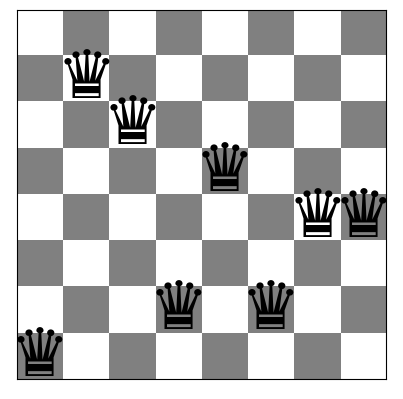

Finished in 2 steps, conflicts = 3
Board with 3 conflicts.


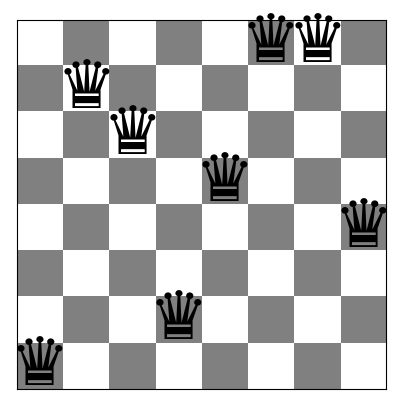

In [52]:
n = 8
start = random_board(n)
print("Start board:")
show_board(start)
final_board, final_conf, steps , _= stochastic_hill_climbing_1(start, verbose=False)
print(f"Finished in {steps} steps, conflicts = {final_conf}")
show_board(final_board)

## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__ 

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

In [53]:
# Code and description go here
def random_neighbor(board):
    """
    Sinh 1 láng giềng cục bộ ngẫu nhiên:
    - Chọn ngẫu nhiên 1 cột và 1 hàng khác để di chuyển hậu.
    """
    n = len(board)
    col = np.random.randint(0, n)
    new_row = np.random.randint(0, n - 1)
    if new_row >= board[col]:
        new_row += 1  # đảm bảo khác hàng hiện tại
    cand = board.copy()
    cand[col] = new_row
    return cand

def stochastic_hill_climbing_2(start_board, max_no_improve=1000, max_iters=100000, verbose=False):
    """
    First-choice hill climbing:
    - Mỗi bước, sinh 1 láng giềng ngẫu nhiên.
    - Nếu láng giềng tốt hơn, chấp nhận ngay.
    - Dừng nếu số lần thử liên tiếp không cải thiện đạt max_no_improve hoặc đạt max_iters.
    Trả về: (final_board, final_conf, steps, no_improve_streak)
    """
    board = start_board.copy()
    curr_conf = conflicts(board)
    steps = 0
    no_improve = 0
    history = [curr_conf]

    while steps < max_iters and no_improve < max_no_improve and curr_conf > 0:
        cand = random_neighbor(board)
        cand_conf = conflicts(cand)
        steps += 1
        if cand_conf < curr_conf:
            board = cand
            curr_conf = cand_conf
            no_improve = 0
            if verbose:
                print(f"Step {steps}: improved to {curr_conf}")
        else:
            no_improve += 1
        history.append(curr_conf)

    return board, curr_conf, steps, no_improve , history

Start board:
Board with 8 conflicts.


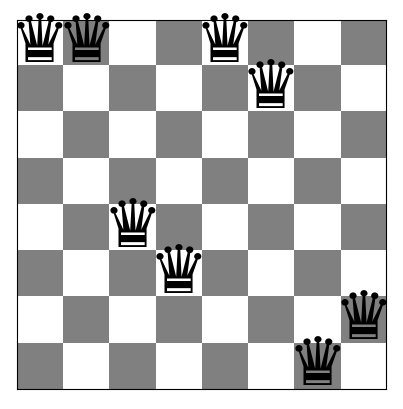

Finished in 2014 steps (no_improve=2000), conflicts = 3
Board with 3 conflicts.


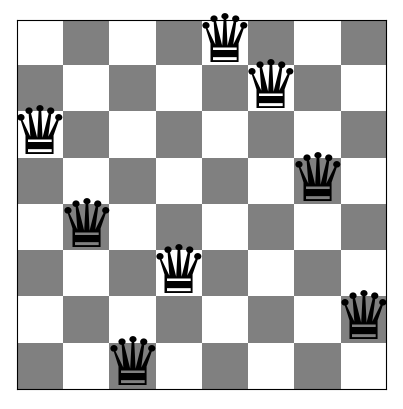

In [54]:
n = 8
start = random_board(n)
print("Start board:")
show_board(start)
final_board, final_conf, steps, no_improve , _ = stochastic_hill_climbing_2(start, max_no_improve=2000, verbose=False)
print(f"Finished in {steps} steps (no_improve={no_improve}), conflicts = {final_conf}")
show_board(final_board)

## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algorithm several times starting with a new random board.

In [55]:
# Code and description go here
def run_with_random_restarts(alg_fn, n, restarts=100, success_conf=0, alg_kwargs=None, verbose=False):
    """
    Chạy thuật toán alg_fn nhiều lần với bàn cờ khởi tạo ngẫu nhiên.
    - alg_fn: hàm thuật toán dạng f(start_board, **kwargs) -> (..., final_conf, steps[, ...])
    - n: kích thước bàn cờ
    - restarts: số lần khởi động lại tối đa
    - success_conf: ngưỡng coi như thành công (0 xung đột)
    - alg_kwargs: dict tham số truyền vào thuật toán
    Trả về: dict chứa lời giải tốt nhất, số lần thành công, ...
    """
    if alg_kwargs is None:
        alg_kwargs = {}

    best = {
        "board": None,
        "conf": float("inf"),
        "steps": None,
        "run_index": None
    }
    success_count = 0

    for r in range(restarts):
        start = random_board(n)
        result = alg_fn(start, **alg_kwargs)
        # chấp nhận nhiều kiểu tuple trả về, miễn có final_conf ở vị trí thứ 2
        # ví dụ:
        # - steepest_ascent_hill_climb -> (final_board, final_conf, steps)
        # - stochastic_hill_climbing_1 -> (final_board, final_conf, steps)
        # - stochastic_hill_climbing_2 -> (final_board, final_conf, steps, no_improve)
        final_board, final_conf = result[0], result[1]
        steps = result[2] if len(result) > 2 else None

        if final_conf < best["conf"]:
            best["board"] = final_board
            best["conf"] = final_conf
            best["steps"] = steps
            best["run_index"] = r

        if final_conf <= success_conf:
            success_count += 1
            if verbose:
                print(f"Run {r}: success with {final_conf} conflicts in {steps} steps.")
            # có thể dừng sớm nếu đã đạt tối ưu
            if success_conf == 0:
                # tiếp tục vẫn được, hoặc break để dừng sớm:
                pass

    return {
        "best_board": best["board"],
        "best_conf": best["conf"],
        "best_steps": best["steps"],
        "best_run_index": best["run_index"],
        "success_count": success_count,
        "total_runs": restarts
    }

Random restarts - Steepest Ascent HC
{'best_board': array([4, 1, 3, 5, 7, 2, 0, 6]), 'best_conf': 0, 'best_steps': 3, 'best_run_index': 11, 'success_count': 15, 'total_runs': 100}
Board with 0 conflicts.


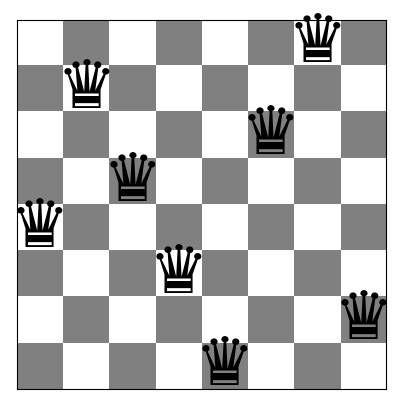

Random restarts - Stochastic HC 1
{'best_board': array([6, 4, 2, 0, 5, 7, 1, 3]), 'best_conf': 0, 'best_steps': 8, 'best_run_index': 3, 'success_count': 22, 'total_runs': 100}
Board with 0 conflicts.


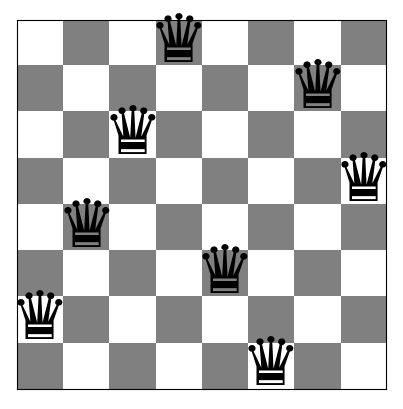

Random restarts - Stochastic HC 2 (First-choice)
{'best_board': array([3, 1, 6, 2, 5, 7, 4, 0]), 'best_conf': 0, 'best_steps': 140, 'best_run_index': 7, 'success_count': 14, 'total_runs': 100}
Board with 0 conflicts.


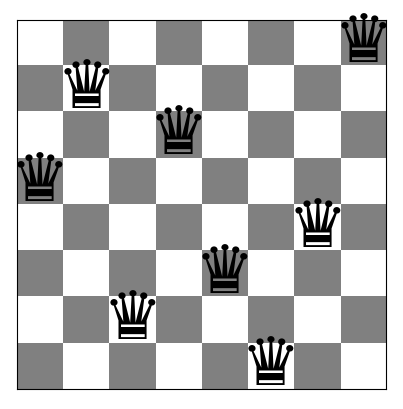

In [56]:
n = 8
restarts = 100

print("Random restarts - Steepest Ascent HC")
res_steepest = run_with_random_restarts(
    steepest_ascent_hill_climb, n, restarts=restarts, success_conf=0,
    alg_kwargs={"max_iters": 10000, "verbose": False}
)
print(res_steepest)
if res_steepest["best_board"] is not None:
    show_board(res_steepest["best_board"])

print("Random restarts - Stochastic HC 1")
res_shc1 = run_with_random_restarts(
    stochastic_hill_climbing_1, n, restarts=restarts, success_conf=0,
    alg_kwargs={"max_iters": 10000, "verbose": False}
)
print(res_shc1)
if res_shc1["best_board"] is not None:
    show_board(res_shc1["best_board"])

print("Random restarts - Stochastic HC 2 (First-choice)")
res_shc2 = run_with_random_restarts(
    stochastic_hill_climbing_2, n, restarts=restarts, success_conf=0,
    alg_kwargs={"max_no_improve": 2000, "max_iters": 100000, "verbose": False}
)
print(res_shc2)
if res_shc2["best_board"] is not None:
    show_board(res_shc2["best_board"])

## Task 5: Simulated Annealing [10 Points]

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


1. Implement simulated annealing for the n-Queens problem.
2. Create a visualization of the search process (a line chart of how the number if conflict changes as the algorithm progrsses).
3. Use this visualization for experiments with different choices for the annealing schedule and discuss what you have learned.

### 🔥 Ý tưởng cốt lõi của Simulated Annealing

Simulated Annealing (tạm dịch: “tôi luyện mô phỏng”) mô phỏng quá trình nhiệt luyện kim loại:

Khi vật liệu nóng → các nguyên tử dao động mạnh (dễ di chuyển đến cấu hình khác, kể cả xấu hơn).

Khi nguội dần → hệ thống ổn định dần quanh cấu hình tốt nhất (ít thay đổi nữa).

Tương tự:

Khi T (nhiệt độ) cao, thuật toán chấp nhận cả những bước “xấu hơn” để thoát khỏi local optimum.

Khi T thấp, thuật toán hành xử như hill climbing, chỉ chấp nhận bước tốt hơn.

⚙️ 2️⃣ Ý nghĩa chi tiết từng tham số

Exponential (exp)	| T = t0 * alpha^k	| alpha ∈ (0,1)	
- Quyết định tốc độ giảm nhiệt.
- Gần 1 → giảm chậm (lâu nguội, tìm tốt hơn).
- Nhỏ hơn → giảm nhanh (nguội sớm, dễ kẹt).

Linear |	T = t0 - beta*k	| beta > 0	
- beta càng nhỏ → giảm chậm hơn.
- Nếu beta quá lớn → T có thể về 0 quá nhanh.

Logarithmic (log)  |	T = t0 / log(1 + c*k + e) |	c > 0	
- c càng lớn → giảm nhanh hơn.
- c nhỏ → giữ nhiệt lâu hơn.

In [57]:
# Code and description go here
import math
# giảm rất nhanh (mượt , phổ biến)
def temp_exp(t0 , alpha, k):
    return t0 *  (alpha ** k )

# Giảm đều
def temp_linear(t0 , beta , k  ):
    return max(t0 - beta ** k , 1e-9 )

# Giảm chậm, giữ nhiệt lâu
def temp_log(t0, c , k ):
    return t0/math.log(1.0 + c * k + math.e)

def simulated_annealing(
    start_board,
    max_iters = 50000,
    t0 = 10.0,
    schedule = "exp", 
    schedule_params = None , 
    verbose  = False                  
    ):
    if schedule_params is None:
        schedule_params = {}
    board = start_board.copy()
    curr_conf = conflicts(board)
    best_conf = curr_conf
    best_board = board.copy()
    
    history_confs = [curr_conf]
    history_temps = []
    
    for k in range(1 , max_iters + 1 ):
        # 1. Tính nhiệt độ 
        if schedule == "exp":
            T = temp_exp(t0, schedule_params.get("alpha" , 0.995) , k )
        elif schedule == "linear":
            T = temp_linear(t0, schedule_params.get("beta" , 1e-3) , k )
        elif schedule == "log":
            T = temp_log(t0 , schedule_params.get("c" , 1.0) , k )
        else:
            raise ValueError("Unknown schedule")
        history_temps.append(T)
        
        # 2. Sinh láng giềng ngẫu nhiên (đổi hàng của 1 cột)
        cand = random_neighbor(board)
        
        # 3. Xem thử chấp nhận không
        cand_conf = conflicts(cand)
        delta = cand_conf - curr_conf
        if delta <= 0:
            board = cand
            curr_conf = cand_conf
        else:
            if np.random.rand() < math.exp(-delta / max(T, 1e-12)):
                board = cand
                curr_conf = cand_conf
                
        # 4. Cập nhật best
        if curr_conf < best_conf:
            best_conf = curr_conf
            best_board = board.copy()

        history_confs.append(curr_conf)
        if verbose and (k % 1000 == 0 or curr_conf == 0):
            print(f"Iter {k}: conf={curr_conf}, best={best_conf}, T={T:.5f}")
        if curr_conf == 0:
            break

    return best_board, best_conf, history_confs, history_temps, k 


Start:
Board with 6 conflicts.


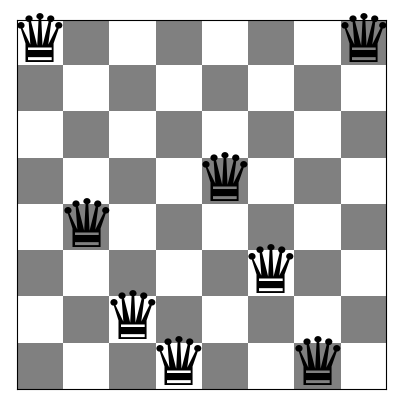

Done in 699 iters. Best conflicts = 0
Board with 0 conflicts.


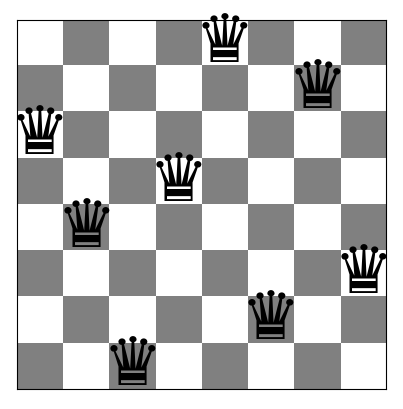

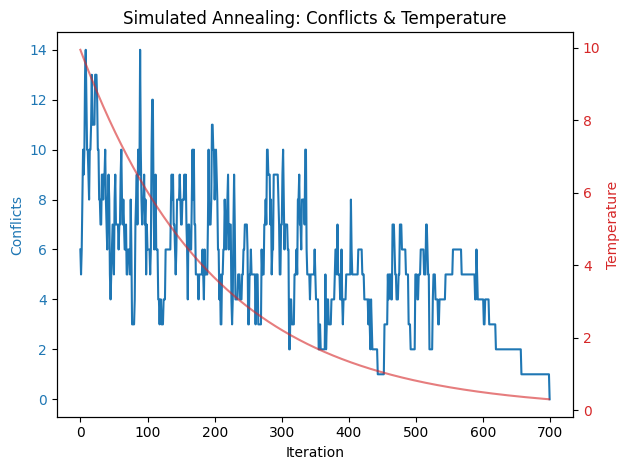

In [58]:

n = 8
start = random_board(n)
print("Start:")
show_board(start)

best_board, best_conf, hist_conf, hist_temp, steps = simulated_annealing(
    start_board=start,
    max_iters=50000,
    t0=10.0,
    schedule="exp",                 # thử 'exp' | 'linear' | 'log'
    schedule_params={"alpha": 0.995},
    verbose=False
)
print(f"Done in {steps} iters. Best conflicts = {best_conf}")
show_board(best_board)

# Trực quan hóa
fig, ax1 = plt.subplots()
ax1.plot(hist_conf, color="tab:blue")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Conflicts", color="tab:blue")
ax1.tick_params(axis='y', labelcolor="tab:blue")

ax2 = ax1.twinx()
ax2.plot(hist_temp, color="tab:red", alpha=0.6)
ax2.set_ylabel("Temperature", color="tab:red")
ax2.tick_params(axis='y', labelcolor="tab:red")

plt.title("Simulated Annealing: Conflicts & Temperature")
plt.tight_layout()
plt.show()

## Task 6: Algorithm Behavior Analysis [20 Points]

### Comparison
Compare the algorithm using runtime and objective function values. Use boards of size 4 and 8 to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 100 times) with different starting boards and report averages.

Complete the following table

| Algorithm           | Board size | Avg. Run time | Avg. number of conflicts | % of runs ending in optimal solution  |
| ------------------- | ---------- | ------------- | --------------------------------- | - |
| Steepest asc. HC    |     4      |               |                                   |   |
| Stochastic HC 1     |     4      |               |                                   |   |
| Stochastic HC 2     |     4      |               |                                   |   |
| Simulated Annealing |     4      |               |                                   |   |
| Steepest asc. HC    |     8      |               |                                   |   |
| Stochastic HC 1     |     8      |               |                                   |   |
| Stochastic HC 2     |     8      |               |                                   |   |
| Simulated Annealing |     8      |               |                                   |   |

Hint: See [Profiling Python Code](../HOWTOs/profiling_code.ipynb) for help about how to measure runtime in Python.

Add the used code here:

In [59]:
# Code
import time
def eval_algorithm(alg_fn, n, runs=100, success_conf=0, alg_kwargs=None, seed=1234):
    """
    Chạy alg_fn nhiều lần trên bàn cờ n×n, đo thời gian, xung đột cuối,
    và tỉ lệ đạt tối ưu (conflicts <= success_conf).
    Trả về dict với avg_time, avg_conflicts, success_rate, details.
    """
    if alg_kwargs is None:
        alg_kwargs = {}
    rng = np.random.default_rng(seed)

    times = []
    confs = []
    successes = 0

    for _ in range(runs):
        start = random_board(n)
        t0 = time.perf_counter()
        result = alg_fn(start, **alg_kwargs)
        t1 = time.perf_counter()

        # Chuẩn hoá tuple trả về:
        # - steepest_ascent_hill_climb -> (final_board, final_conf, steps)
        # - stochastic_hill_climbing_1 -> (final_board, final_conf, steps)
        # - stochastic_hill_climbing_2 -> (final_board, final_conf, steps, no_improve)
        # - simulated_annealing -> (best_board, best_conf, hist_conf, hist_temp, steps)
        final_conf = result[1]

        times.append(t1 - t0)
        confs.append(final_conf)
        if final_conf <= success_conf:
            successes += 1

    return {
        "avg_time": float(np.mean(times)),
        "avg_conflicts": float(np.mean(confs)),
        "success_rate": successes / runs,
        "runs": runs
    }

In [60]:
def print_results_table(results, title="Kết quả"):
    print(f"\n{title}")
    header = (
        "| {:<25} | {:>10} | {:>16} | {:>25} | {:>35} |"
        .format("Algorithm", "Board size", "Avg. Run time", 
                "Avg. number of conflicts", "% Optimal Solutions")
    )
    print(header)
    print("|" + "-" * (len(header) - 2) + "|")  # dòng gạch ngang

    for row in results:
        print(
            "| {:<25} | {:>10} | {:>16.6f} | {:>25.3f} | {:>34.1f}% |"
            .format(
                row["name"],
                row["n"],
                row["avg_time"],
                row["avg_conflicts"],
                row["success_rate"] * 100
            )
        )

# ==================== CẤU HÌNH ====================
runs = 100                 # >= 100 theo đề bài
sizes = [4, 8]             # n=4 và 8
success_conf = 0           # coi tối ưu khi xung đột = 0

# Tham số thuật toán (có thể tinh chỉnh thêm)
steepest_kwargs = {"max_iters": 20000, "verbose": False}
shc1_kwargs = {"max_iters": 20000, "verbose": False}
shc2_kwargs = {"max_no_improve": 2000, "max_iters": 100000, "verbose": False}
sa_kwargs   = {"max_iters": 50000, "t0": 10.0, "schedule": "exp", "schedule_params": {"alpha": 0.995}, "verbose": False}

# ==================== CHẠY THỬ NGHIỆM ====================
all_rows = []
for n in sizes:
    # Steepest-ascent HC
    r = eval_algorithm(steepest_ascent_hill_climb, n, runs=runs, success_conf=success_conf, alg_kwargs=steepest_kwargs)
    all_rows.append({"name": "Steepest asc. HC", "n": n, **r})

    # Stochastic HC 1
    r = eval_algorithm(stochastic_hill_climbing_1, n, runs=runs, success_conf=success_conf, alg_kwargs=shc1_kwargs)
    all_rows.append({"name": "Stochastic HC 1", "n": n, **r})

    # Stochastic HC 2 (First-choice)
    r = eval_algorithm(stochastic_hill_climbing_2, n, runs=runs, success_conf=success_conf, alg_kwargs=shc2_kwargs)
    all_rows.append({"name": "Stochastic HC 2", "n": n, **r})

    # Simulated Annealing
    r = eval_algorithm(simulated_annealing, n, runs=runs, success_conf=success_conf, alg_kwargs=sa_kwargs)
    all_rows.append({"name": "Simulated Annealing", "n": n, **r})

# ==================== IN BẢNG KẾT QUẢ ====================
print_results_table(all_rows, title=f"Kết quả trung bình trên {runs} lần chạy")


Kết quả trung bình trên 100 lần chạy
| Algorithm                 | Board size |    Avg. Run time |  Avg. number of conflicts |                 % Optimal Solutions |
|-----------------------------------------------------------------------------------------------------------------------------|
| Steepest asc. HC          |          4 |         0.000425 |                     0.780 |                               33.0% |
| Stochastic HC 1           |          4 |         0.000330 |                     0.740 |                               34.0% |
| Stochastic HC 2           |          4 |         0.022773 |                     0.760 |                               38.0% |
| Simulated Annealing       |          4 |         0.002612 |                     0.000 |                              100.0% |
| Steepest asc. HC          |          8 |         0.003753 |                     1.180 |                               18.0% |
| Stochastic HC 1           |          8 |         0.004768 |     

### Algorithm Convergence (Sự hội tụ của thuật toán)

For each algorithm implemented, describe the typical convergence pattern (fast initial improvement vs. steady progress).
Include a plot showing the objective function value over iterations for one representative run of each algorithm on the 8-queens problem.
Explain which algorithms exhibit plateaus or getting stuck in local optima most frequently.

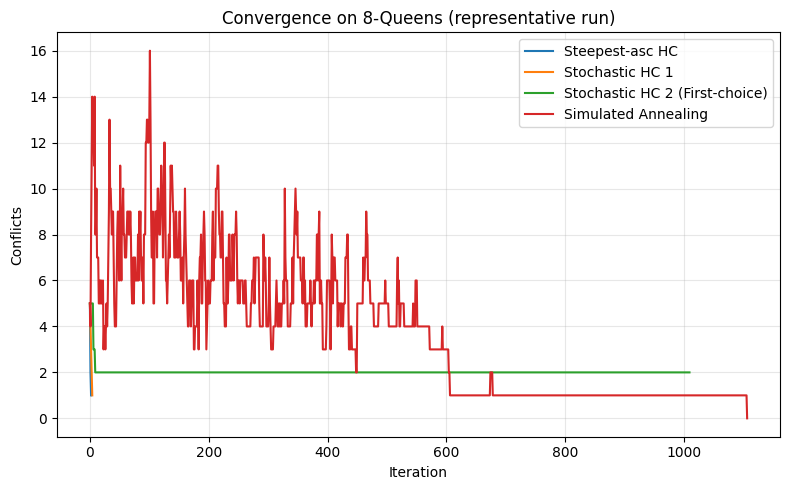

In [61]:
# Code and description go here4/-0
n = 8
start = random_board(n)

_, _, _,  hist_steep = steepest_ascent_hill_climb(start)
_, _, _,hist_shc1  = stochastic_hill_climbing_1(start)
_, _,_, _,hist_shc2  = stochastic_hill_climbing_2(start)
_, _, hist_sa , _,_   = simulated_annealing(start, max_iters=50000, t0=10.0)

plt.figure(figsize=(8,5))
plt.plot(hist_steep, label="Steepest-asc HC")
plt.plot(hist_shc1,  label="Stochastic HC 1")
plt.plot(hist_shc2,  label="Stochastic HC 2 (First-choice)")
plt.plot(hist_sa,    label="Simulated Annealing")
plt.xlabel("Iteration")
plt.ylabel("Conflicts")
plt.title("Convergence on 8-Queens (representative run)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Problem Size Scalability (Khả năng mở rộng quy mô vấn đề)

Create a log-log plot showing how runtime scales with board size ($n=4, 8, 12, 16, 20$) for at least two algorithms.
Estimate the empirical time complexity (Big O) for each algorithm based on your results.
Identify which algorithm scales best for large problem sizes and explain why.

In [62]:
# Code and description go here

def time_algorithm(alg_fn , n , runs = 10 , alg_kwargs = None):
    if alg_kwargs is None:
        alg_kwargs = {}
    times = []
    for _ in range(runs):
        start = random_board(n)
        t0 = time.perf_counter()
        alg_fn(start , **alg_kwargs)
        t1 = time.perf_counter()
        times.append(t1 - t0)
    return np.mean(times)

def plot_scalability(sizes, times_dict , title = "Algorithm Scalability" ):
    plt.figure(figsize=(10,6))
    
    colors = ['blue', 'red', 'green', 'orange']
    for i , (name , times) in enumerate(times_dict.items()):
        plt.loglog(sizes , times , "o-" , label = name, color=colors[i % len(colors)], linewidth=2, markersize=8 )
        
        log_sizes = np.log(sizes)
        log_times = np.log(times)
        coeffs = np.polyfit(log_sizes , log_times , 1 )
        slope = coeffs[0]
        # Vẽ đường fit
        fit_sizes = np.logspace(np.log10(min(sizes)), np.log10(max(sizes)), 100)
        fit_times = np.exp(coeffs[1]) * (fit_sizes ** slope)
        plt.loglog(fit_sizes, fit_times, '--', color=colors[i % len(colors)], alpha=0.7)
        
        print(f"{name}: slope = {slope:.2f} → O(n^{slope:.2f})")
        plt.xlabel("Board Size (n)")
    plt.ylabel("Runtime (seconds)")
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def analyze_scalability(sizes, times_dict):
    print("\n=== Scalability Analysis ===")
    
    for name, times in times_dict.items():
        # Ước lượng Big O
        log_sizes = np.log(sizes)
        log_times = np.log(times)
        coeffs = np.polyfit(log_sizes, log_times, 1)
        slope = coeffs[0]
        
        print(f"{name}: Estimated complexity = O(n^{slope:.2f})")
        
        # Dự đoán thời gian cho n lớn hơn
        if slope > 0:
            print(f"  → For n=50: estimated {np.exp(coeffs[1]) * (50**slope):.2f}s")
            print(f"  → For n=100: estimated {np.exp(coeffs[1]) * (100**slope):.2f}s")
    
    # So sánh thuật toán
    print("\n=== Algorithm Comparison ===")
    if len(times_dict) >= 2:
        names = list(times_dict.keys())
        times1 = times_dict[names[0]]
        times2 = times_dict[names[1]]
        
        print(f"At n=20: {names[0]} vs {names[1]}")
        print(f"  Speedup: {times2[-1]/times1[-1]:.2f}x")


Testing scalability...
Testing n=4...
  Steepest: 0.0005s, SA: 0.0033s
Testing n=8...
  Steepest: 0.0058s, SA: 0.0463s
Testing n=12...
  Steepest: 0.0214s, SA: 0.1002s
Testing n=16...
  Steepest: 0.0789s, SA: 0.2053s
Testing n=20...
  Steepest: 0.1515s, SA: 0.2744s
Steepest-asc HC: slope = 3.63 → O(n^3.63)
Simulated Annealing: slope = 2.74 → O(n^2.74)


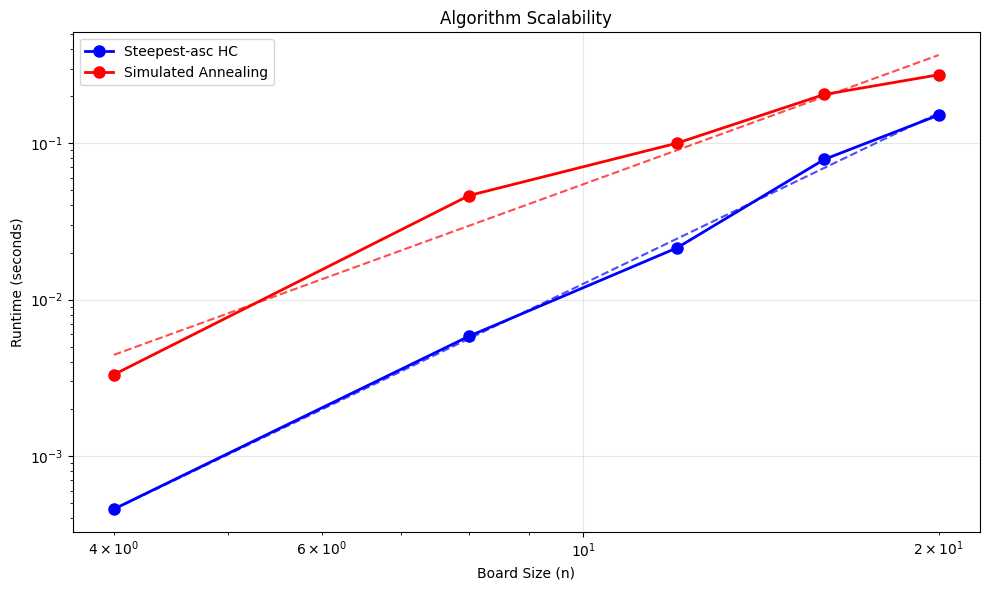


=== Scalability Analysis ===
Steepest-asc HC: Estimated complexity = O(n^3.63)
  → For n=50: estimated 4.35s
  → For n=100: estimated 53.81s
Simulated Annealing: Estimated complexity = O(n^2.74)
  → For n=50: estimated 4.53s
  → For n=100: estimated 30.36s

=== Algorithm Comparison ===
At n=20: Steepest-asc HC vs Simulated Annealing
  Speedup: 1.81x


In [63]:
# ===== CHẠY THỬ NGHIỆM =====
sizes = [4, 8, 12, 16, 20]
runs = 10

print("Testing scalability...")
times_steepest = []
times_sa = []

for n in sizes:
    print(f"Testing n={n}...")
    
    # Steepest-ascent HC
    t_steep = time_algorithm(steepest_ascent_hill_climb, n, runs=runs, 
                            alg_kwargs={"max_iters": 50000, "verbose": False})
    times_steepest.append(t_steep)
    
    # Simulated Annealing
    t_sa = time_algorithm(simulated_annealing, n, runs=runs,
                         alg_kwargs={"max_iters": 100000, "t0": 10.0, 
                                   "schedule": "exp", "schedule_params": {"alpha": 0.995}, 
                                   "verbose": False})
    times_sa.append(t_sa)
    
    print(f"  Steepest: {t_steep:.4f}s, SA: {t_sa:.4f}s")

# Vẽ đồ thị và phân tích
times_dict = {
    "Steepest-asc HC": times_steepest,
    "Simulated Annealing": times_sa
}

plot_scalability(sizes, times_dict)
analyze_scalability(sizes, times_dict)

## Advanced task: Exploring other Local Moves Operators

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

### Move Operator Implementation 

Implement the following local move operators:

* Single-step move: Move one queen only one square up or down at a time
* Column swap: Exchange the positions of queens in two randomly selected columns
* Dual-queen move: Select two queens and move both simultaneously
* Adaptive move: Design your own operator that adapts which local move it uses based on the current state (e.g., focuses on queens with most conflicts or randomly chooses one of the moves above)

### Experimental Analysis

Using the 8-Queens and 12-Queens problems: Run your Stochastic Hill Climbing 2 implementation with each move operator 100 times
For each operator, create a visualization showing:

* Average solution quality over iterations
* Distribution of final solution qualities
* Average time to solution for successful runs

### Discussion

Describe what you have learned from the experiments. Which operator works best for which situation and why?

In [64]:
# Code and description go here

## More Things to Do (not for credit)

If the assignment was to easy for yuo then you can think about the following problems. These problems are challenging and not part of this assignment. 

### Implement a Genetic Algorithm for the n-Queens problem

In [65]:
# Code and description go here